<a href="https://colab.research.google.com/github/yskim1230/AIB_Section1-PJT_Game-Production-Plan/blob/main/Sprint1_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<center>최소한 이 정도는 알았으면 하는 내용만을 간추려서 정리했습니다.</center>
<center>어쩌면 이 정도만 알아도 충분할 수 있습니다. 하지만 더 많이 알면 더 좋습니다.</center>

# **A.회귀 모델**

- Linear Regression 알고리즘으로 회귀 모델을 만듭니다.

### **1.환경 준비**

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=600 align="left"/>

# 개요
실제 현장에서는 2~3번 과정이 85%의 공수가 들어가고 모델링은 5%정도 공수가 들어간다고 생각하면 된다.


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [3]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality_simple.csv'
data = pd.read_csv(path)

### **2.데이터 이해**

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=600 align="left"/>

In [4]:
# 상위 몇 개 행 확인
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


In [5]:
# 하위 몇 개 행 확인
data.tail()

,Ozone,Solar.R,Wind,Temp,Month,Day
148,30,193.0,6.9,70,9,26
149,23,145.0,13.2,77,9,27
150,14,191.0,14.3,75,9,28
151,18,131.0,8.0,76,9,29
152,20,223.0,11.5,68,9,30


In [7]:
# 변수 정보(변수 이름, 데이터 형식, 개수 등) 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


In [9]:
# 기술통계 확인
data.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.052288,185.931507,9.957516,77.882353,6.993464,15.803922
std,30.156127,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,20.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,34.000000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,59.000000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [14]:
# 상관관계 확인
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


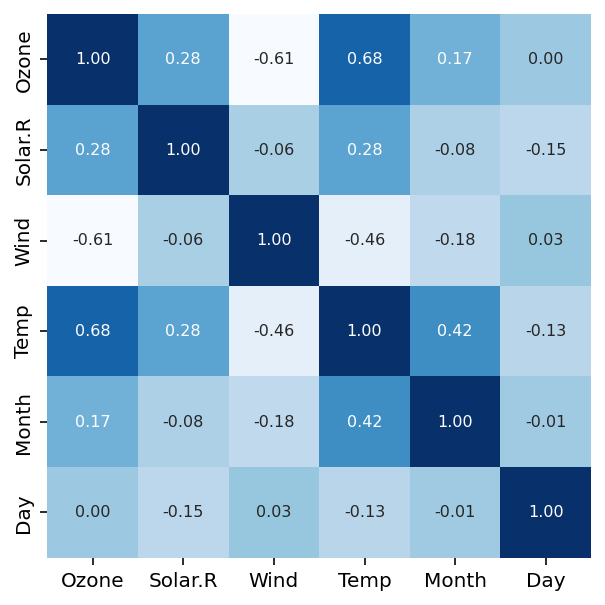

In [15]:
# 상관관계 확인
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), 
            annot=True, 
            cmap='Blues', 
            fmt='.2f', 
            cbar=False, 
            square=True,
            annot_kws={'size': 8})
plt.show()

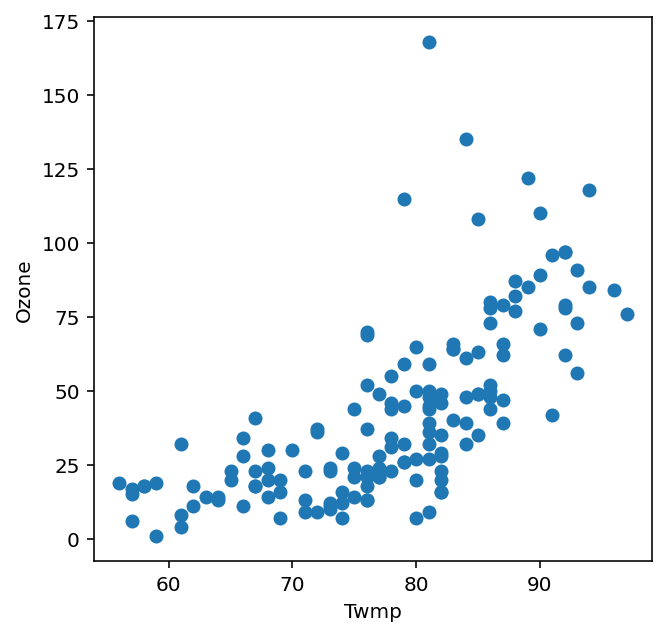

In [17]:
# Temp --> Ozone 관계 시각화
plt.figure(figsize=(5, 5))
plt.scatter(data['Temp'], data['Ozone'])
plt.xlabel('Twmp')
plt.ylabel('Ozone')
plt.show()

### **3.데이터 준비**

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=600 align="left"/>

**1) 결측치 처리**

- 결측치가 있으면 제거하거나 적절한 값으로 채웁니다.

In [18]:
# 결측치 확인
data.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [21]:
# 전날 값으로 결측치 채우기
data.fillna(method='ffill', inplace=True)

# 확인
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 변수 제거**

- 분석에 의미가 없다고 판단되는 변수는 제거합니다.

In [22]:
# 변수 제거
drop_cols = ['Month', 'Day']
data.drop(drop_cols, axis = 1, inplace=True)

# 확인
data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


**3) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [23]:
# target 확인
target = 'Ozone'

# 데이터 분리
X = data.drop(target, axis = 1)
y = data.loc[:, target] # y = data[target] 과 같은 의미



**4) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

**학습용/검증용/평가용 분리**

<img src = "https://github.com/Jangrae/img/blob/master/train_val_test.png?raw=true" width=550 align="left"/>

**학습용/평가용 분리**

<img src = "https://github.com/Jangrae/img/blob/master/train_val_test_02.png?raw=true" width=550 align="left"/>

In [24]:
# 함수 불러오기
from sklearn.model_selection import train_test_split

# 3:1로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)  # 테스트 사이즈는 기본 0.25이고 정수를 써넣으면 25 이런식으로. 마지막 25개 행을 테스트 사이즈로 보겠다

# 확인
print('학습용:', X_train.shape, y_train.shape)
print('평가용:', X_test.shape, y_test.shape)

학습용: (114, 3) (114,)
평가용: (39, 3) (39,)


### **4.모델링**

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=600 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 사용할 알고리즘을 정하고 모델링을 진행합니다.


**모델링 과정**

<img src = "https://github.com/Jangrae/img/blob/master/modeling.png?raw=true" width=600 align="left"/>

In [25]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression

In [26]:
# 2단계: 선언하기
model = LinearRegression()

In [27]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LinearRegression()

현장에서는 최종 모델을 파일로 저장한다. 왜? 한번 돌리는데 너무 오래 걸리는 경우가 많아서


In [28]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [30]:
# 회귀 계수 확인
print(list(X)) # x.colums로 해도 된다
print(model.coef_) # 이건 y= ax +b 같은 거에서 a기울기
print(model.intercept_)  # 이건 b 절편

['Solar.R', 'Wind', 'Temp']
[ 0.05247327 -3.13436805  1.57528735]
-60.529563567686466


In [31]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

[24 18 97 47 34 22 66 18 69 27]
[15.69215011  7.24989582 80.80370563 58.3110736  50.39464118 32.20917413
 66.14278521 -7.12579258 49.54925017 39.66027263]


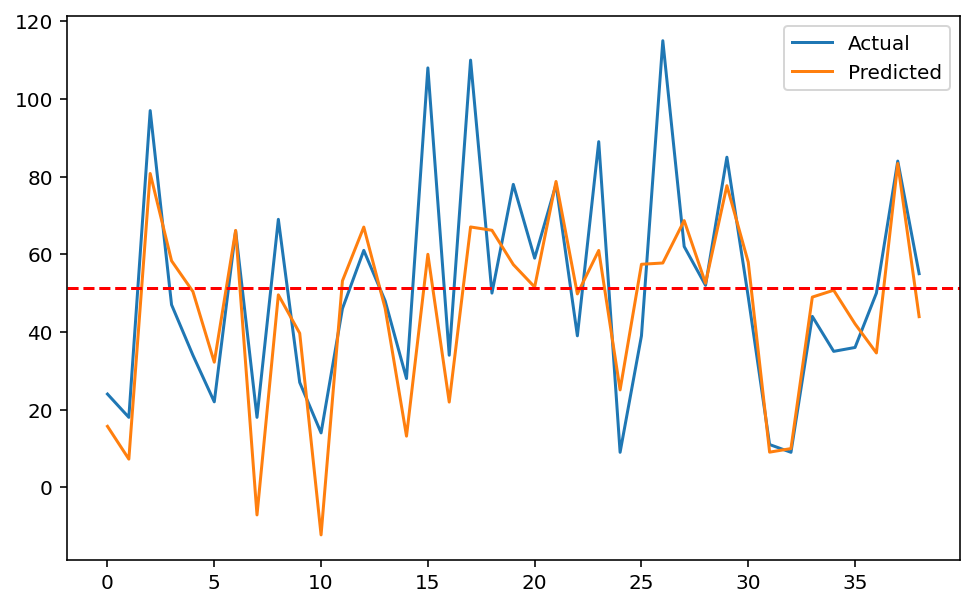

In [32]:
# 실젯값, 예측값 시각화
plt.figure(figsize=(8, 5))
plt.plot(y_test.values)
plt.plot(y_pred)
plt.axhline(y_test.mean(), color='r', linestyle='--')
plt.legend(['Actual', 'Predicted'])
plt.show()

### **5.성능 평가**

- 다양한 성능 지표로 회귀 모델 성능을 평가합니다.

**1) MAE(Mean Absolute Error)**


$$\large MAE=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|$$

yi  = y_test
y^i = y_pred

In [33]:
# 함수 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
print('MAE:', mean_absolute_error(y_test, y_pred))

MAE: 13.991255590035836


**2) MSE(Mean Squared Error)**

$$\large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

In [34]:
# 함수 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 353.5571885505928


**3) RMSE(Root Mean Squared Error)**


$$\large RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}$$

In [35]:
# 함수 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('RMSE:', mean_squared_error(y_test, y_pred)**(1/2))

RMSE: 18.803116458464878


- 0.5 제곱 대신에 squared=False 옵션을 지정해도 됩니다.

In [36]:
# 함수 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False)) # squared 는 루트 씌우는것

RMSE: 18.803116458464878


**4) R2-Score**

$$\large R^2=\frac{SSR}{SST}=1-\frac{SSE}{SST}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^2}$$

In [37]:
# 함수 불러오기
from sklearn.metrics import r2_score

# 성능 평가
print('R2-Score:', r2_score(y_test, y_pred))

R2-Score: 0.5655647315840588


- r2_score() 함수 대신에 **score()** 메소드를 사용할 수 있습니다.
- 단 전달하는 값이 y_test, y_pred이 아닌 x_test, y_test 입니다.

In [39]:
# 성능 평가 = R2
print('학습 Score:', model.score(X_train, y_train)) # 학습도 할 수있다
print('평가 Score:', model.score(X_test, y_test))

학습 Score: 0.5824964839859238
평가 Score: 0.5655647315840588


**만일**

- 성능 평가 전에 모델의 성능을 확인하고 싶다면 **K-분할 교차검증(K-Fold Cross Validation)**을 사용합니다.
- **cross_val_score** 함수를 사용해 모델의 성능을 예측할 수 있습니다.


In [41]:
# 함수 불러오기
from sklearn.model_selection import cross_val_score

# 모델 성능 예측
model = LinearRegression()
cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# 성능 확인
print(cv_score)
print('평균:', cv_score.mean())

[0.69370571 0.26871915 0.6774972  0.3982206  0.59788068]
평균: 0.5272046690133421


### **6.기타**

- Linear Regression은 OOOOO OO 수록 모델이 복잡해집니다. -> **독립변수가 많을**
- 모델이 너무 복잡해 지면 OOOO이 발생할 수 있습니다. -> **과대적합**
- 이를 해결하는 방법 중 하나로 다음과 같은 알고리즘을 사용할 수 있습니다. 

**1) Ridge**

- Ridge 알고리즘을 사용하면 변수들의 가중치 크기를 제어할 수 있습니다.
- 그렇다고 특정 변수의 가중치를 0으로 바꾸지는 않습니다.
- 적절한 $\lambda$(람다)값 설정이 필요합니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}(w_j)^2 $$

**2) Lasso**

- Lasso 알고리즘을 사용하면 중요하지 않은 변수의 가중치를 0으로 바꿀 수 있습니다.
- 이를 통해 불필요한 변수들을 제거할 수 있습니다. 
- 적절한 $\lambda$(람다)값 설정이 필요합니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\lambda\sum_{j=1}^{p}|w_j| $$

**3) ElasticNet**

- ElasticNet 알고리즘을 사용하면 Ridge와 Lasso 기능을 같이 사용할 수 있습니다.
- 적절한 $\lambda$(람다), $\gamma$(감마)값 설정이 필요합니다.

$$ \large cost=\sum_{i=1}^{n}(y_i-\hat y)^2+\gamma\lambda\sum_{j=1}^{p}|w_j|+\frac{1-\gamma}{2}\lambda\sum_{j=1}^{p}(w_j)^2 $$

# **B.분류 모델**

- Logistic Regression 알고리즘으로 분류 모델을 만듭니다.

### **1.환경 준비**

- 기본 **라이브러리**와 대상 **데이터**를 가져와 이후 과정을 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_11.png?raw=true" width=600 align="left"/>

In [42]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [43]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

### **2.데이터 이해**

- 분석할 데이터를 **충분히 이해**할 수 있도록 다양한 **탐색** 과정을 수행합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_12.png?raw=true" width=600 align="left"/>

In [44]:
# 상/하위 몇 개 행 확인
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [45]:
# 하위 몇 개 행 확인
data.tail()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0
499,327,113,4,4.5,4.5,9.04,0,1


In [46]:
# 변수 정보(변수 이름, 데이터 형식, 개수 등) 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [47]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [50]:
# Target 분포 확인
data['ADMIT'].value_counts()

0    282
1    218
Name: ADMIT, dtype: int64

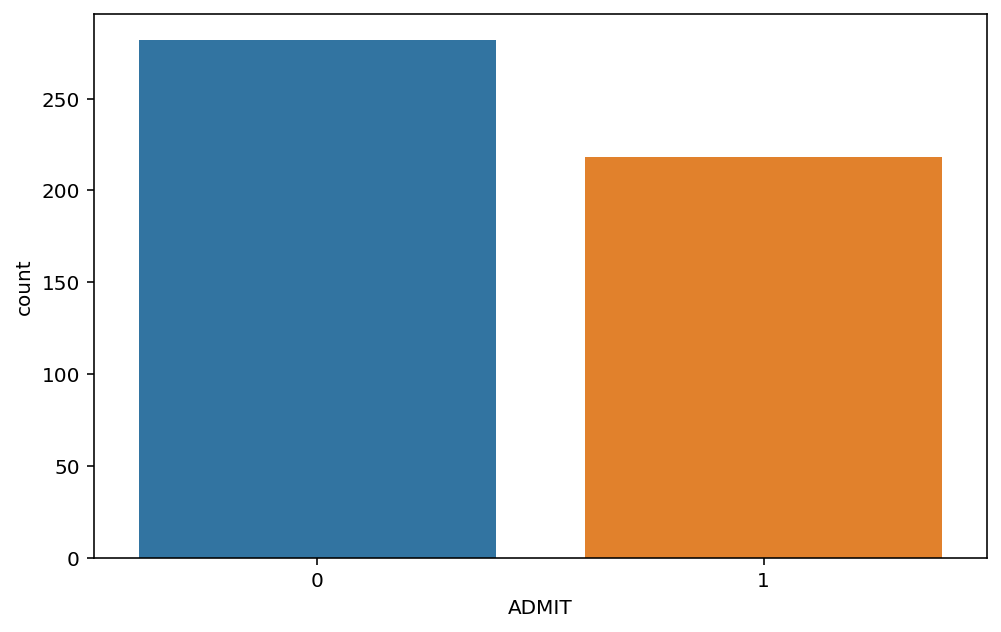

In [52]:
# Target 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x=data['ADMIT'])
plt.show()

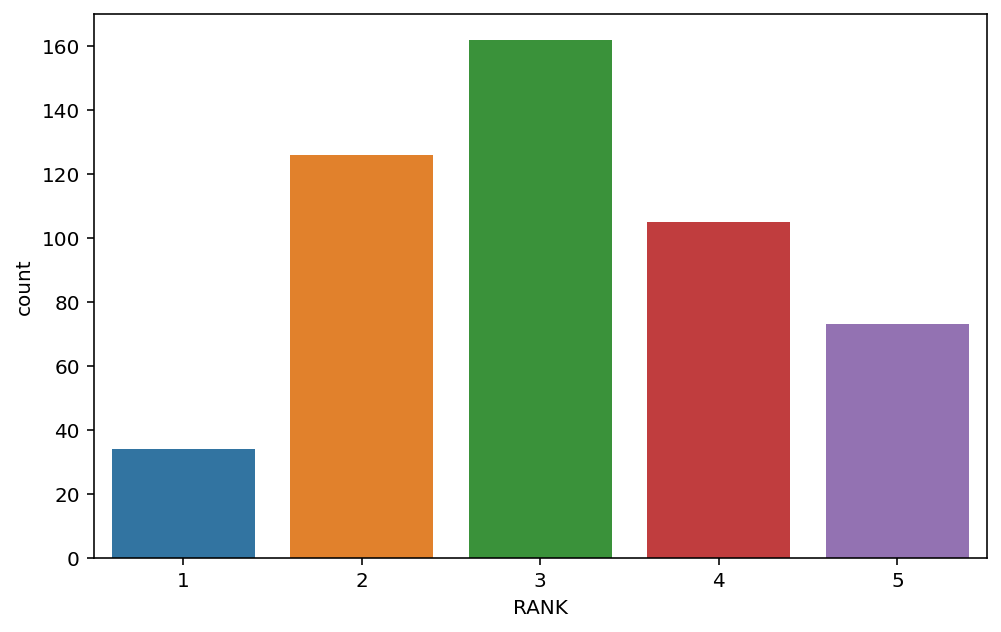

In [54]:
# RANK 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x=data['RANK'])
plt.show()

### **3.데이터 준비**

- **전처리** 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_13.png?raw=true" width=600 align="left"/>

**1) x, y 분리**

- 우선 target 변수를 명확히 지정합니다.
- target을 제외한 나머지 변수들 데이터는 x로 선언합니다.
- target 변수 데이터는 y로 선언합니다. 
- 이 결과로 만들어진 x는 데이터프레임, y는 시리즈가 됩니다.
- 이후 모든 작업은 x, y를 대상으로 진행합니다.

In [55]:
# target 확인
target = 'ADMIT'

# 데이터 분리
X = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

- 학습용, 평가용 데이터를 적절한 비율로 분리합니다.
- Target 값, 즉 y의 값이 고르게 분포되도록 설정합니다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정합니다.

In [56]:
# 함수 불러오기
from sklearn.model_selection import train_test_split

# 3:1로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y,  random_state=1) #stratify  옵션 알아두기

# 확인
print('학습용:', X_train.shape, y_train.shape)
print('평가용:', X_test.shape, y_test.shape)

학습용: (375, 7) (375,)
평가용: (125, 7) (125,)


**3) One-Hot Encoding**

- RANK 변수에 대한 원-핫 인코딩을 수행합니다.
- 범주값 이지만 숫자형 변수이므로 One-Hot Encoding을 하지 않아도 오류는 발생하지 않습니다.
- 꼭 One-Hot Encoding을 해야 하는 것은 아니지만, 다양한 시도를 해봐야 합니다.

In [57]:
# 패키지 설치
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.2 MB/s eta 0:00:00


In [60]:
# 함수 불러오기
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=['RANK'], use_cat_names=True) # cols 파라미터 안넣으면 모든 문자열에 대해서 진행, use_cat_names g확인
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

# 확인
X_train.head()

,GRE,TOEFL,RANK_5.0,RANK_1.0,RANK_3.0,RANK_2.0,RANK_4.0,SOP,LOR,GPA,RESEARCH
362,338,115,1,0,0,0,0,4.5,5.0,9.23,1
160,315,103,0,1,0,0,0,1.5,2.0,7.86,0
116,299,102,0,0,1,0,0,4.0,3.5,8.62,0
7,308,101,0,0,0,1,0,3.0,4.0,7.90,0
198,311,104,0,0,1,0,0,4.5,4.5,8.43,0


### **4.모델링**

- 본격적으로 모델을 **선언**하고 **학습**하고 **평가**하는 과정을 진행합니다.
- 우선 **회귀** 문제인지 **분류** 문제인지 명확히 구분합니다.

<img src = "https://github.com/Jangrae/img/blob/master/code_14.png?raw=true" width=600 align="left"/>

- 회귀 문제 인가요? 분류 문제인가요?
- 회귀인지 분류인지에 따라 사용할 알고리즘과 평가 방법이 달라집니다.
- 사용할 알고리즘을 정하고 모델링을 진행합니다.

**참고: Sigmoid 함수**

$$ \huge \frac{1}{1-e^{-f(x)}}  $$

**모델링 과정**

<img src = "https://github.com/Jangrae/img/blob/master/modeling.png?raw=true" width=600 align="left"/>

In [61]:
# 1단계: 불러오기
from sklearn.linear_model import LogisticRegression

In [62]:
# 2단계: 선언하기
model = LogisticRegression()

In [63]:
# 3단계: 학습하기
model.fit(X_train, y_train)

LogisticRegression()

In [64]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [65]:
# 실젯값, 예측값 비교
print(y_test.values[:10])
print(y_pred[:10])

[0 0 1 0 1 0 0 1 1 0]
[0 1 0 0 1 0 0 1 1 0]


In [66]:
# 확률값 확인
y_prob = model.predict_proba(X_test)
y_prob[:10]

array([[0.97421352, 0.02578648],
       [0.46036816, 0.53963184],
       [0.58327216, 0.41672784],
       [0.9809414 , 0.0190586 ],
       [0.00752256, 0.99247744],
       [0.95368331, 0.04631669],
       [0.61541726, 0.38458274],
       [0.15469869, 0.84530131],
       [0.43893163, 0.56106837],
       [0.77063175, 0.22936825]])

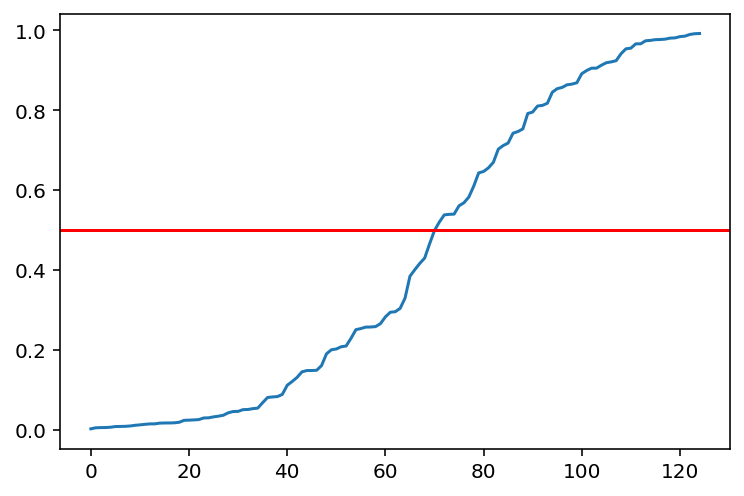

In [67]:
# 확률값 시각화
y_prob = y_prob[:, 1]
y_prob.sort()
plt.plot(y_prob)
plt.axhline(0.5, color='r')
plt.show()

### **5.성능 평가**

- 다양한 성능 지표로 분류 모델 성능을 평가합니다.

**1) Confusion Matrix**

In [68]:
# 함수 불러오기
from sklearn.metrics import confusion_matrix

# 성능 평가
print(confusion_matrix(y_test, y_pred))

[[61 10]
 [10 44]]


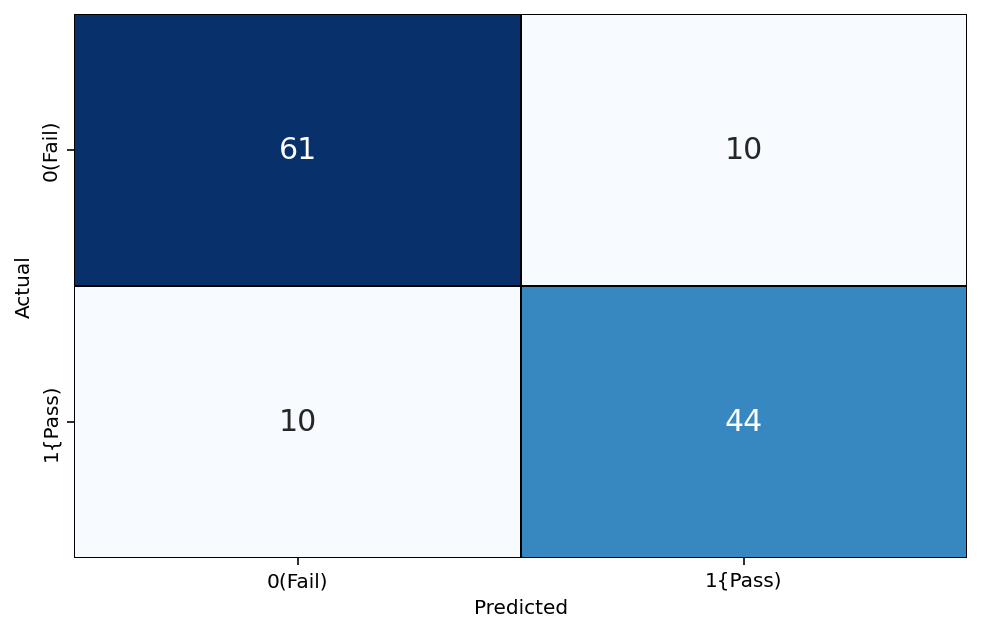

In [80]:
# 혼동행렬 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, 
            cmap='Blues',
            cbar=False,
            linecolor='k',
            linewidths=0.8,
            xticklabels=['0(Fail)', '1{Pass)'],
            yticklabels=['0(Fail)', '1{Pass)'],
            annot_kws={'size': 15})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**2) Accuracy**

$$\large Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$

In [70]:
# 함수 불러오기
from sklearn.metrics import accuracy_score

# 성능 평가
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.84


- accuracy_score() 함수 대신에 **score()** 메소드를 사용할 수 있습니다.
- 단 전달하는 값이 y_test, y_pred이 아닌 X_test, y_test 입니다.

In [72]:
# 성능 평가
print('Score:', model.score(X_test, y_test))

Score: 0.84


**3) Precision**

$$\large Precision = \frac{TP}{TP+FP}$$

In [73]:
# 함수 불러오기
from sklearn.metrics import precision_score

# 성능 평가
print('Precision:', precision_score(y_test, y_pred, average=None)) #average에 다양한 옵션이 들어간다

Precision: [0.85915493 0.81481481]


**4) Recall**

$$\large Recall = \frac{TP}{TP+FN}$$

In [74]:
# 함수 불러오기
from sklearn.metrics import recall_score

# 성능 평가
print('Recall:', recall_score(y_test, y_pred, average=None))

Recall: [0.85915493 0.81481481]


**5) F1-Score**

$$\large F1 = \frac{2\times Precision\times Recall}{Precision+Recall}$$

In [75]:
# 함수 불러오기
from sklearn.metrics import f1_score

# 성능 평가
print('F1-Score:', f1_score(y_test, y_pred, average=None))

F1-Score: [0.85915493 0.81481481]


**6) Classification Report**

In [76]:
# 함수 불러오기
from sklearn.metrics import classification_report

# 성능 평가
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        71
           1       0.81      0.81      0.81        54

    accuracy                           0.84       125
   macro avg       0.84      0.84      0.84       125
weighted avg       0.84      0.84      0.84       125



**참고: 임계값(Threshold) 조정**

- 기본값이 0.5인 임계값을 조절해서 모델의 성능을 변화시킬 수 있습니다.
- 이를 통해 정밀도를 낮춰서라도 재현율(=민감도)를 높일 수도 있습니다.
- 학습 데이터를 사용해 모델의 성능이 변함을 확인합니다.

In [77]:
# 임계값 조정
threshold = 0.4
y_prob = model.predict_proba(X_train)[:, 1]  # 1에 대한 확률값
y_pred2 = y_prob >= threshold
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       211
           1       0.81      0.89      0.85       164

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.87      0.86      0.86       375



### **6.마무리**

- 맨 먼저 **회귀문제**인지 **분류문제**인지 확인합니다.
- 그리고 사용할 **알고리즘**과 **평가지표**를 결정합니다.
- 모델이 언제 **복잡**해지고 **과적합**이 발생하는지 알아야 합니다.
- 그리고 과적합 문제를 해결하는 방법을 알아야 합니다.
- **과적합 해결** 방법은 사용한 알고리즘에 따라 다릅니다.
- <font color='red'>**많은 경험**</font>은 아직 갖출 수 없지만, <font color='blue'>**많은 시도**</font>는 할 수 있습니다.